# Part II - Ford GoBike System Data Exploration
## by Onuh Kingsley


## Investigation Overview


> The goal of this project is to investigate when are most trips taken in terms of time of day, day of the week, or month of the year?
How long does the average trip take?
Does the above depend on if a user is a subscriber or customer?

## Summary of Findings
> From the investigation, most trips took place in the morning and night and it happened on Thursday. I could not get the complete year dataset from the link provided because it's no longing opening. The one I worked with has just two months data and most trips took place in the month of february 2019 The average trip to 600 seconds (10 Minutes)


## Dataset Overview

> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [31]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
import datetime
import calendar
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [32]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ford_go_bike_clean.csv')

In [33]:
# Change data type
time = ['start_time', 'end_time']
station_id = ['start_station_id', 'end_station_id']
df[time] = df[time].astype('datetime64[ns]')
df[station_id] = df[station_id].round()
df[station_id] = df[station_id].astype('Int64')
df['member_birth_year'] = df['member_birth_year'].fillna(0)
df['member_birth_year'] = df['member_birth_year'].astype('int64')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')

## (Visualization 1)

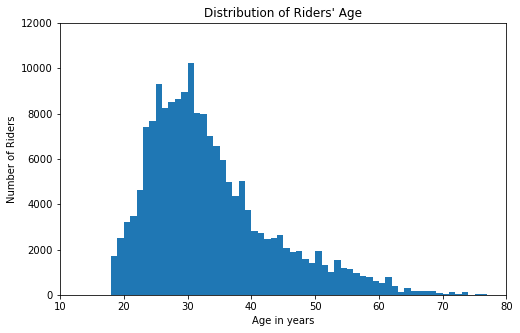

In [35]:
# Age distribution using members' birth year using the lowest age 1939 to the 2009.
binsize = 1
bins = np.arange(0, df['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year', bins = bins)
plt.axis([1979, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title("Distribution of Riders' Age")
plt.xlabel('Age in years')
plt.ylabel('Number of Riders')
plt.show()

From the distribution above, we can see that the age distribution is more concentrated between 20 to 40 years.

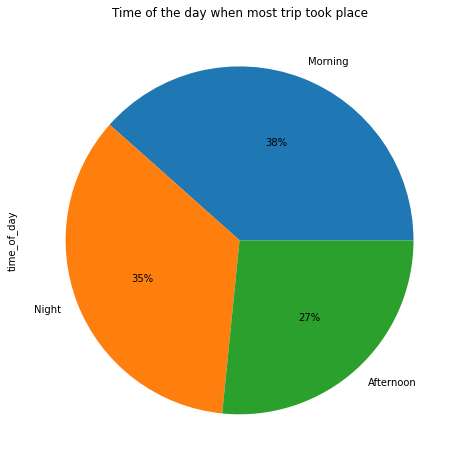

In [36]:
# Find out when most of the trip took place 
df['time_of_day'].value_counts().plot(kind='pie', figsize =(8,8), autopct='%1.0f%%')
plt.title('Time of the day when most trip took place');

From the pie chart below, most trips took place in the morning and decrease toward the afternoon but increase in the evening. 

## (Visualization 2)

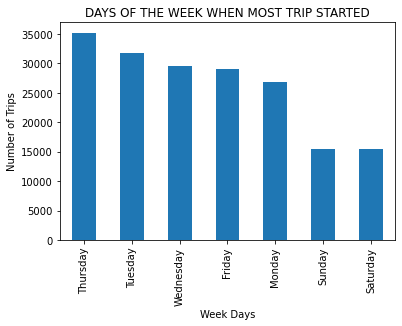

In [44]:
# Day of the week when most trip started
df['day_of_the_week'].value_counts().plot(kind = 'bar')
plt.title('DAYS OF THE WEEK WHEN MOST TRIP STARTED')
plt.xlabel('Week Days')
plt.ylabel('Number of Trips');

From the char below, most trips started on Thursday

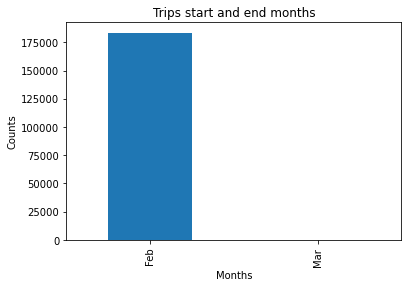

In [42]:
# Get the different months from the datetime
df['start_month_no'] = df['start_time'].apply(lambda time: time.month)
df['end_month_no'] = df['end_time'].apply(lambda time: time.month)
df['start_month'] = df['start_month_no'].apply(lambda x: calendar.month_abbr[x])
df['end_month'] = df['end_month_no'].apply(lambda x: calendar.month_abbr[x])
df['end_month'].value_counts().plot(kind = 'bar')
plt.title('Trips start and end months')
plt.xlabel('Months')
plt.ylabel('Counts');

A bar chart showing the number of riders based on user type (customers and subscribers)

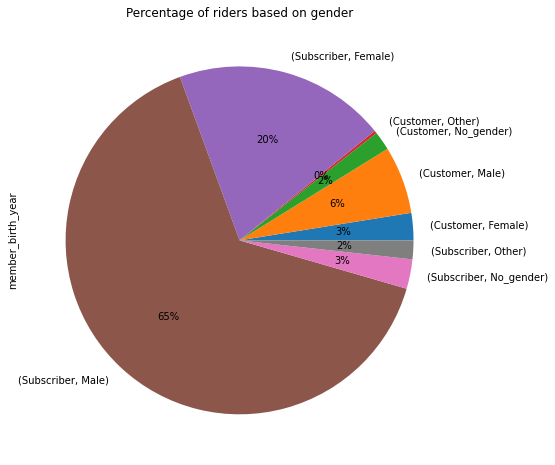

In [43]:
# Function to show percentage of riders based on riders type and gender
def pie_chart(x):
    df.groupby(['user_type', x]).count()['member_birth_year'].plot(kind ='pie', figsize =(8,8), autopct='%1.0f%%')
    return
# Pie chart showing percentage of riders
pie_chart(df['member_gender'])
plt.title('Percentage of riders based on gender');

From the pie chart above, 68% males riders are subscibers and 7% are customers while 21% female riders are subscribers and 3% are customers. 2% other riders are subscribers with no customer.

## (Visualization 3)

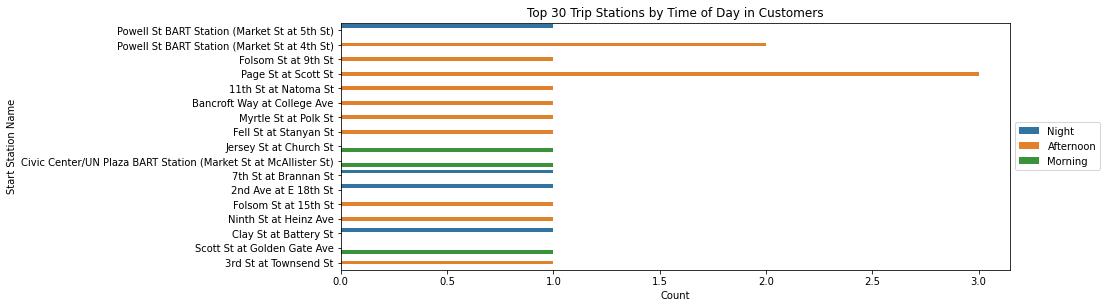

In [45]:
# Using countplot and 3 categorical variables time of day (morning, afternoon, night between), member birth start station name
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=df.nlargest(20, 'duration_sec'), y='start_station_name', hue='time_of_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 30 Trip Stations by Time of Day in Customers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

From the plot above, more trips were started in the afternoon from Page St at Scott St.

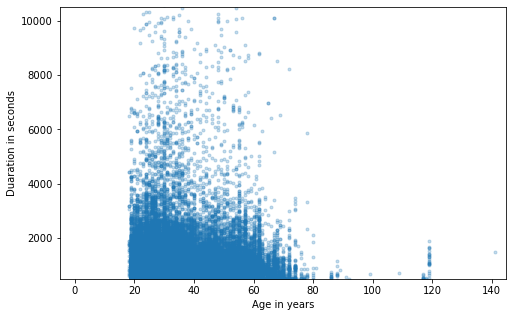

In [46]:
# Correlation between trip duration and age.
plt.figure(figsize=[8,5])
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age in years')
plt.ylabel('Duaration in seconds')
plt.show()

Most of the trip durations are below 6000 and age is below 80

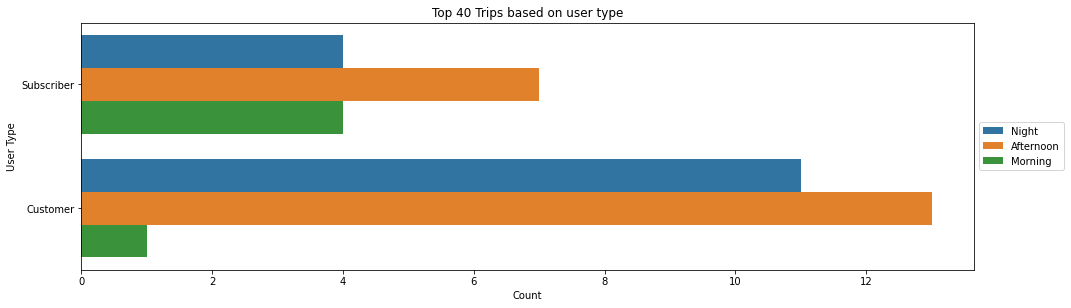

In [48]:
# Using countplot and 3 categorical variables time of day (morning, afternoon, night between), member birth start station name
plt.figure(figsize=(16,10))
ax = plt.subplot(211)
sb.countplot(data=df.nlargest(40, 'duration_sec'), y='user_type', hue='time_of_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 40 Trips based on user type')
plt.xlabel('Count')
plt.ylabel('User Type');

More riders prefer to go on a ride in the afternoon and night than in the morning